In [35]:
import datetime
from pathlib import Path

import imageio
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from tlo.analysis.life_expectancy import get_life_expectancy_estimates
from tlo.analysis.utils import (
    extract_results,
    format_gbd,
    make_age_grp_lookup,
    make_age_grp_types,
    make_calendar_period_lookup,
    make_calendar_period_type,
    summarize,
    unflatten_flattened_multi_index_in_logging,
)

min_year = 2020
max_year = 2060

results_folder = Path("/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z")
resourcefilepath = Path("/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z")
agegrps, agegrplookup = make_age_grp_lookup()
calperiods, calperiodlookup = make_calendar_period_lookup()
births_results = extract_results(
        results_folder,
        module="tlo.methods.demography",
        key="on_birth",
        custom_generate_series=(
            lambda df: df.assign(year=df['date'].dt.year).groupby(['year'])['year'].count()
        ),
        do_scaling=True
    )
print(births_results)

births_results = births_results.groupby(by=births_results.index).sum()
births_results = births_results.replace({0: np.nan})

births_model = summarize(births_results, collapse_columns=True)
births_model.columns = ['Model_' + col for col in births_model.columns]

 

draw             0                                                          \
run              0             1             2             3             4   
year                                                                         
2010  628547.29707  643232.30216  640615.17254  621277.49257  631746.01105   
2011  541745.83134  528514.78715  545526.12968  523280.52791  535929.98774   
2012  554249.89508  554686.08335  564718.41356  560356.53086  545380.73359   
2013  580421.19128  569661.88062  590017.33322  579403.41865  583329.11308   
2014  591035.10585  598450.30644  596996.34554  592925.25502  615025.46070   
2015  607901.05229  617497.19423  602812.18914  613571.49980  618514.96686   
2016  637998.04292  625203.18700  634217.74458  636689.47811  644977.05524   
2017  648321.16531  636834.87420  646431.01614  634072.34849  658062.70334   
2018  659225.87206  640324.38036  657917.30725  651083.69102  671148.35144   
2019  676237.21459  643232.30216  656317.95026  660679.83296  65

/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:354: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'mean': results.groupby(axis=1, by='draw', sort=False).mean(),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:355: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'lower': results.groupby(axis=1, by='draw', sort=False).quantile(0.025),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:356: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'upper': results.groupby(axis=1, by='draw', sort=False).quantile(0.975),


In [36]:
births_model

,Model_lower,Model_mean,Model_upper
year,,,
2010,608693.460981,628838.089250,642643.447996
2011,516519.609725,534156.155442,546314.903468
2012,545969.587755,555064.113184,568324.236592
2013,571166.730152,580508.428934,589330.336695
2014,580748.332483,595716.859948,614567.463016
2015,603957.183349,617046.466351,623505.687649
2016,608864.301386,632342.135019,644061.059873
2017,628325.568033,643813.886520,657408.420935
2018,637281.967177,654020.692038,670265.070193


Get expected disturbance from the model?

In [49]:
scenario = 'ssp585'#'ssp245'

In [50]:
predictions_from_cmip = pd.read_csv(f'/Users/rem76/Desktop/Climate_change_health/Data/weather_predictions_with_X_{scenario}.csv')

In [51]:
predictions_from_cmip_sum = predictions_from_cmip.groupby('Year').sum().reset_index()
predictions_from_cmip_sum

,Year,Month,Facility_ID,Altitude,Zone,Resid,Owner,Facility_Type,Precipitation,Lag_1_Precipitation,Lag_2_Precipitation,Lag_3_Precipitation,Lag_4_Precipitation,Predicted_Weather_Model,Predicted_No_Weather_Model,Difference_in_Expectation
0,2025,23814,599734,3182595.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,356930.256793,294609.145696,251778.819911,240074.691709,212611.355306,262073.177045,414580.859514,-1806.379897
1,2026,22590,566009,3008054.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,442012.194055,397157.668329,397273.347895,348266.651361,329607.014297,391897.166673,394712.494598,-2815.327925
2,2027,24474,614678,3269771.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,401910.341187,414186.725872,420900.694753,423488.413324,427242.313426,424216.303078,426507.644233,-2291.341155
3,2028,23968,600596,3207601.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,458028.122792,454173.805476,433342.964932,425159.752149,409583.757336,418663.778757,419005.094793,-341.316036
4,2029,23330,583610,3116929.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,406191.851826,439691.054081,445950.755762,418870.421666,404708.312917,405721.982368,407774.686109,-2052.703741
5,2030,24073,605374,3226700.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,409387.038984,389364.247808,392455.710835,397461.356243,389452.051202,422077.382352,421235.583604,841.798749
6,2031,23580,593098,3161559.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,400600.129109,392631.249314,374449.656015,373894.307761,361847.942122,406625.933041,406869.091856,-243.158815
7,2032,23000,576874,3067975.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,447521.070185,402914.631768,394545.775941,380305.249049,367935.056473,390456.768764,393982.523859,-3525.755094
8,2033,23581,593277,3157142.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,456815.880827,498011.574391,475942.063738,466685.963435,443793.819493,404036.109552,407105.988595,-3069.879043
9,2034,24459,614471,3272543.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,443520.485079,441306.486897,449381.026641,430634.351876,428705.248932,419086.106241,421792.859293,-2706.753053


In [52]:
predictions_from_cmip_sum['Percentage_Difference'] = (predictions_from_cmip_sum['Difference_in_Expectation'] / predictions_from_cmip_sum['Predicted_No_Weather_Model']) 
predictions_from_cmip_sum

,Year,Month,Facility_ID,Altitude,Zone,Resid,Owner,Facility_Type,Precipitation,Lag_1_Precipitation,Lag_2_Precipitation,Lag_3_Precipitation,Lag_4_Precipitation,Predicted_Weather_Model,Predicted_No_Weather_Model,Difference_in_Expectation,Percentage_Difference
0,2025,23814,599734,3182595.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,356930.256793,294609.145696,251778.819911,240074.691709,212611.355306,262073.177045,414580.859514,-1806.379897,-0.004357
1,2026,22590,566009,3008054.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,442012.194055,397157.668329,397273.347895,348266.651361,329607.014297,391897.166673,394712.494598,-2815.327925,-0.007133
2,2027,24474,614678,3269771.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,401910.341187,414186.725872,420900.694753,423488.413324,427242.313426,424216.303078,426507.644233,-2291.341155,-0.005372
3,2028,23968,600596,3207601.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,458028.122792,454173.805476,433342.964932,425159.752149,409583.757336,418663.778757,419005.094793,-341.316036,-0.000815
4,2029,23330,583610,3116929.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,406191.851826,439691.054081,445950.755762,418870.421666,404708.312917,405721.982368,407774.686109,-2052.703741,-0.005034
5,2030,24073,605374,3226700.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,409387.038984,389364.247808,392455.710835,397461.356243,389452.051202,422077.382352,421235.583604,841.798749,0.001998
6,2031,23580,593098,3161559.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,400600.129109,392631.249314,374449.656015,373894.307761,361847.942122,406625.933041,406869.091856,-243.158815,-0.000598
7,2032,23000,576874,3067975.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,447521.070185,402914.631768,394545.775941,380305.249049,367935.056473,390456.768764,393982.523859,-3525.755094,-0.008949
8,2033,23581,593277,3157142.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,456815.880827,498011.574391,475942.063738,466685.963435,443793.819493,404036.109552,407105.988595,-3069.879043,-0.007541
9,2034,24459,614471,3272543.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,443520.485079,441306.486897,449381.026641,430634.351876,428705.248932,419086.106241,421792.859293,-2706.753053,-0.006417


In [53]:
X_Data = pd.read_csv(f'/Users/rem76/Desktop/Climate_change_health/Data/X_basis_weather_filtered_predictions_{scenario}.csv')
X_Data

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,318.723452,111.486502,2025.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1099.0,0.084097
1,367.076374,115.202853,2025.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632.0,0.089463
2,302.196208,76.629523,2025.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,873.0,NaN
3,546.639789,153.713254,2025.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,873.0,NaN
4,297.013829,80.416504,2025.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,873.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166277,273.660745,102.473417,2070.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,485.0,0.162431
166278,147.334300,60.726971,2070.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,508.0,0.116303
166279,147.334300,60.726971,2070.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,873.0,NaN
166280,249.590817,83.738491,2070.0,11.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1149.0,0.233156


In [54]:
births_model_subset = births_model.iloc[15:].copy()

matching_rows = min(len(births_model_subset), len(predictions_from_cmip_sum))

multiplied_values = births_model_subset.head(matching_rows).iloc[:, 1].values * predictions_from_cmip_sum['Percentage_Difference'].head(matching_rows).values

births_model_subset['Multiplied_Values'] = multiplied_values

In [55]:
predictions_from_cmip_sum

,Year,Month,Facility_ID,Altitude,Zone,Resid,Owner,Facility_Type,Precipitation,Lag_1_Precipitation,Lag_2_Precipitation,Lag_3_Precipitation,Lag_4_Precipitation,Predicted_Weather_Model,Predicted_No_Weather_Model,Difference_in_Expectation,Percentage_Difference
0,2025,23814,599734,3182595.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,356930.256793,294609.145696,251778.819911,240074.691709,212611.355306,262073.177045,414580.859514,-1806.379897,-0.004357
1,2026,22590,566009,3008054.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,442012.194055,397157.668329,397273.347895,348266.651361,329607.014297,391897.166673,394712.494598,-2815.327925,-0.007133
2,2027,24474,614678,3269771.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,401910.341187,414186.725872,420900.694753,423488.413324,427242.313426,424216.303078,426507.644233,-2291.341155,-0.005372
3,2028,23968,600596,3207601.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,458028.122792,454173.805476,433342.964932,425159.752149,409583.757336,418663.778757,419005.094793,-341.316036,-0.000815
4,2029,23330,583610,3116929.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,406191.851826,439691.054081,445950.755762,418870.421666,404708.312917,405721.982368,407774.686109,-2052.703741,-0.005034
5,2030,24073,605374,3226700.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,409387.038984,389364.247808,392455.710835,397461.356243,389452.051202,422077.382352,421235.583604,841.798749,0.001998
6,2031,23580,593098,3161559.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,400600.129109,392631.249314,374449.656015,373894.307761,361847.942122,406625.933041,406869.091856,-243.158815,-0.000598
7,2032,23000,576874,3067975.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,447521.070185,402914.631768,394545.775941,380305.249049,367935.056473,390456.768764,393982.523859,-3525.755094,-0.008949
8,2033,23581,593277,3157142.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,456815.880827,498011.574391,475942.063738,466685.963435,443793.819493,404036.109552,407105.988595,-3069.879043,-0.007541
9,2034,24459,614471,3272543.0,Central WestSouth EastNorthernSouth EastNorthe...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,443520.485079,441306.486897,449381.026641,430634.351876,428705.248932,419086.106241,421792.859293,-2706.753053,-0.006417


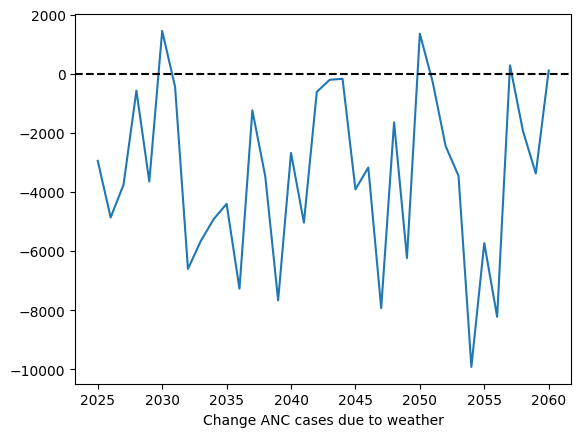

In [56]:
year_range = range(2025, 2061)

plt.plot(year_range, multiplied_values)
plt.xlabel("Change ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--') 

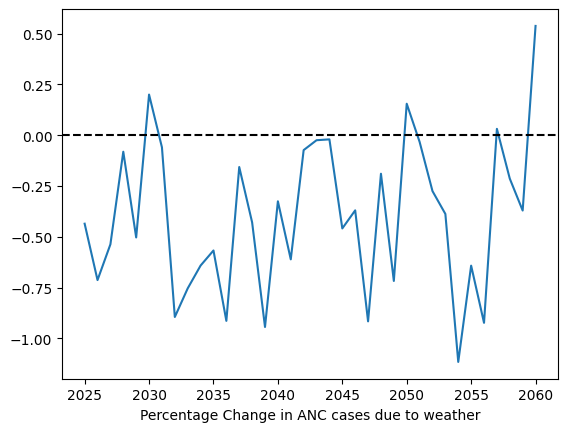

In [57]:
plt.plot(year_range, predictions_from_cmip_sum.iloc[0:36, -1]*100)
plt.xlabel("Percentage Change in ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--') 

# Negative values - missed cases?

In [58]:
negative_sum = np.sum(multiplied_values[multiplied_values < 0])

print("Sum of values < 0:", negative_sum)

Sum of values < 0: -124529.77354513475


Difference by Zone

/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_89216/4003818095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_89216/4003818095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
/var

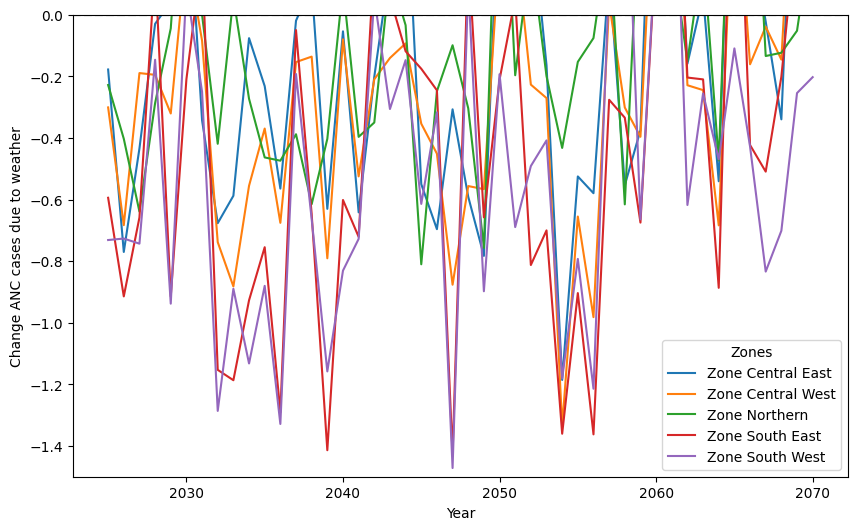

In [59]:
predictions_from_cmip_sum = predictions_from_cmip.groupby(['Year', 'Zone']).sum().reset_index()

# Plot each zone
plt.figure(figsize=(10, 6))
for zone in predictions_from_cmip_sum['Zone'].unique():
    zone_data = predictions_from_cmip_sum[predictions_from_cmip_sum['Zone'] == zone]
    zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
    plt.plot(zone_data['Year'], zone_data['Percentage_Difference'], label=f'Zone {zone}')

plt.xlabel("Year")
plt.ylabel("Change ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1.5, 0)
plt.legend(title='Zones')
plt.show()